# A General Framework for Linear Models

In [1]:
import sympy
from sympy import init_printing
import numpy as np
from numpy.linalg import inv

init_printing()
np.set_printoptions(precision=3, suppress=True)

A simple enlightment on the fact that
$$
    \Phi^T \Phi = \sum_{i=1}^{N} \phi(x_i) \phi(x_i)^T
$$

Consider
* $\Phi \in \mathbb{R}^{N\times M}$
* $\phi(x_i) \in \mathbb{R}^{M\times 1}$

In [2]:
phi_01 = sympy.symbols("\phi_{0}(x_1)")
phi_02 = sympy.symbols("\phi_{0}(x_2)")

phi_11 = sympy.symbols("\phi_{1}(x_1)")
phi_12 = sympy.symbols("\phi_{1}(x_2)")

phi_21 = sympy.symbols("\phi_{2}(x_1)")
phi_22 = sympy.symbols("\phi_{2}(x_2)")

In [3]:
Phi = sympy.Matrix([
    [phi_01, phi_02],
    [phi_11, phi_12],
    [phi_21, phi_22]
])

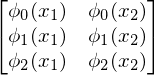

In [4]:
# N: number of datapoints
# M: number of basis functions
Phi

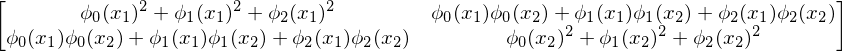

In [5]:
E1 = Phi.T @ Phi
E1

In [6]:
phi_0 = sympy.Matrix([[phi_01, phi_02]]).T
phi_1 = sympy.Matrix([[phi_11, phi_12]]).T
phi_2 = sympy.Matrix([[phi_21, phi_22]]).T

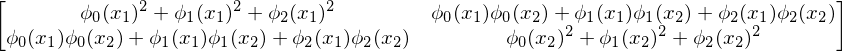

In [7]:
E2 = phi_0 @ phi_0.T + phi_1 @ phi_1.T + phi_2 @ phi_2.T
E2

In [8]:
E1 == E2

True

## Geometrical Representation for least squares

In [10]:
def pseudoinverse(phi):
    return inv(phi.T @ phi) @ phi.T

In [22]:
N, M = 5, 5
Phi = np.random.randn(N, M)
Phi @ pseudoinverse(Phi)

array([[ 1., -0., -0., -0.,  0.],
       [-0.,  1., -0.,  0.,  0.],
       [-0.,  0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [-0., -0.,  0., -0.,  1.]])

In [18]:
v = np.array([2, 1, 4, 1, 5, 7, 1]).reshape(-1, 1)
v

array([[2],
       [1],
       [4],
       [1],
       [5],
       [7],
       [1]])

In [19]:
Phi @ pseudoinverse(Phi) @ v

array([[ 0.377],
       [-0.539],
       [ 5.032],
       [ 2.076],
       [ 2.962],
       [ 6.791],
       [ 0.752]])